In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

### Train Dataset

In [3]:
train = pd.read_csv("/Users/abdulmueez/Desktop/Papers/TENSYMP/A-Cost-Effective-Framework-to-Predict-the-Ripeness-of-any-Fruit-Based-on-Color/Dataset (CSV)/train.csv")
print(train.shape)
train.head()

(20, 5)


,file_name,hue1,hue2,hue3,ripeness_index
0,g078.jpg,69.0,68.0,69.0,1.0
1,g052.jpg,66.0,60.0,62.0,1.0
2,g026.jpg,65.0,59.0,69.0,1.0
3,g001.jpg,70.0,71.0,61.0,1.0
4,g104.jpg,72.0,73.0,66.0,1.0


### Test Dataset

In [4]:
test = pd.read_csv("/Users/abdulmueez/Desktop/Papers/TENSYMP/A-Cost-Effective-Framework-to-Predict-the-Ripeness-of-any-Fruit-Based-on-Color/Dataset (CSV)/test.csv")
print(test.shape)
test.head()

(253, 5)


,file_name,hue1,hue2,hue3,ripeness_index
0,g057.jpg,70.0,62.0,67.0,1.0
1,g043.jpg,69.0,68.0,62.0,1.0
2,g094.jpg,78.0,74.0,71.0,1.0
3,g080.jpg,73.0,73.0,63.0,1.0
4,g081.jpg,72.0,72.0,63.0,1.0


### KNN accuracy w/ <font color='red'>k = 5</font>

In [5]:
train = train.drop("file_name", 1)
test = test.drop("file_name", 1)

X_train = train.drop(columns=["ripeness_index"])
y_train = train["ripeness_index"].values

X_test = test.drop(columns=["ripeness_index"])
y_test = test["ripeness_index"].values

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.849802371541502

### Confusion Matrix

In [7]:
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
confusion_matrix(y_test, y_pred)

0.849802371541502


array([[94,  5,  0,  0],
       [ 4, 35,  4,  0],
       [ 0, 16, 66,  1],
       [ 0,  0,  8, 20]])

### KNN accuracy for all possible values of <font color='red'>k</font>

In [8]:
k_range = list(range(1, 21))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    scores.append(accuracy)
    print("k =",k,", acc =",accuracy)

k = 1 , acc = 82.21343873517787
k = 2 , acc = 68.77470355731225
k = 3 , acc = 75.49407114624506
k = 4 , acc = 83.00395256916995
k = 5 , acc = 84.98023715415019
k = 6 , acc = 79.84189723320159
k = 7 , acc = 84.98023715415019
k = 8 , acc = 83.399209486166
k = 9 , acc = 83.79446640316206
k = 10 , acc = 82.21343873517787
k = 11 , acc = 77.4703557312253
k = 12 , acc = 71.14624505928853
k = 13 , acc = 66.00790513833992
k = 14 , acc = 59.683794466403164
k = 15 , acc = 53.359683794466406
k = 16 , acc = 53.359683794466406
k = 17 , acc = 52.96442687747036
k = 18 , acc = 52.569169960474305
k = 19 , acc = 52.17391304347826
k = 20 , acc = 39.130434782608695


### Accuracy vs k graph

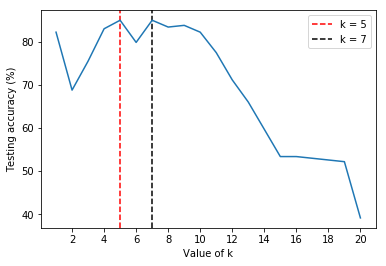

In [15]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline


# Integer axis
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Tick intervals
import matplotlib.ticker as plticker
loc_x = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc_x)
loc_y = plticker.MultipleLocator(base=10)
ax.yaxis.set_major_locator(loc_y)

# Markings
# x coordinates for the lines
xcoords = [5,7]
# colors for the lines
colors = ['red','black']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc,linestyle='--', label='k = {}'.format(xc), c=c)    
plt.legend()

# Plot graph
plt.plot(k_range, scores, color="#1f77b4")
plt.xlabel('Value of k')
plt.ylabel('Testing accuracy (%)')

# Markers
#plt.plot(k_range, scores, 'x', markevery=[4,6], color="brown", markersize=10)

# Save figure
plt.savefig('n_neighbors_legend.png', format='png', dpi=200)